In [75]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from common import NWSL, Fonts, Colors, add_twitter_handle

In [48]:
# Inclusive age range for the middle group
prime = (25, 27)

# Read in the data and perform preprocessing

In [49]:
# Read in the data
df = pd.read_csv("data/nwsl_minutes.csv", index_col=[0, 1])
idx = df.index.names
df

15     16  17  18     19      20      21      22  \
team year                                                                     
BOS  2016                 NaN    NaN NaN NaN    NaN     NaN   100.0  1429.0   
     2017                 NaN    NaN NaN NaN    NaN     NaN  1559.0  1626.0   
CHI  2016                 NaN    NaN NaN NaN    NaN     NaN     NaN  1647.0   
     2017                 NaN    NaN NaN NaN    NaN     NaN   134.0   327.0   
     2018                 NaN    NaN NaN NaN    NaN     NaN    90.0   521.0   
...                       ...    ...  ..  ..    ...     ...     ...     ...   
WAS  2022                 NaN    NaN NaN NaN  270.0  1234.0     NaN   300.0   
     2022 Challenge Cup   NaN    NaN NaN NaN  522.0     NaN     NaN   418.0   
     2023                75.0  213.0 NaN NaN    NaN   624.0  1011.0  1731.0   
     2023 Challenge Cup  74.0  251.0 NaN NaN    NaN     NaN     NaN   659.0   
WNY  2016                 NaN    NaN NaN NaN    NaN    45.0  1388.0  4492.0   

                             23      24  ...     33     34  35  36  37  38  \
team year                                ...                                 
BOS  2016                3093.0  4263.0  ...    NaN    NaN NaN NaN NaN NaN   
     2017                4395.0  5899.0  ...  804.0    NaN NaN NaN NaN NaN   
CHI  2016                6440.0  2912.0  ...    NaN    NaN NaN NaN NaN NaN   
     2017                2682.0  6555.0  ...    NaN    NaN NaN NaN NaN NaN   
     2018                 485.0  5950.0  ...    NaN    NaN NaN NaN NaN NaN   
...                         ...     ...  ...    ...    ...  ..  ..  ..  ..   
WAS  2022                6404.0   708.0  ...  195.0  180.0 NaN NaN NaN NaN   
     2022 Challenge Cup  1529.0   387.0  ...  455.0    NaN NaN NaN NaN NaN   
     2023                1951.0  4124.0  ...   19.0    NaN NaN NaN NaN NaN   
     2023 Challenge Cup  1131.0  1035.0  ...   36.0    NaN NaN NaN NaN NaN   
WNY  2016                5995.0  2131.0  ...    NaN    NaN NaN NaN NaN NaN   

                         39  40     41  42  
team year                                   
BOS  2016               NaN NaN    NaN NaN  
     2017               NaN NaN    NaN NaN  
CHI  2016               NaN NaN    NaN NaN  
     2017               NaN NaN    NaN NaN  
     2018               NaN NaN    NaN NaN  
...                      ..  ..    ...  ..  
WAS  2022               NaN NaN    NaN NaN  
     2022 Challenge Cup NaN NaN    NaN NaN  
     2023               NaN NaN  181.0 NaN  
     2023 Challenge Cup NaN NaN  360.0 NaN  
WNY  2016               NaN NaN    NaN NaN  

[118 rows x 28 columns]

In [50]:
# Group together teams that are the same
df.index = pd.MultiIndex.from_tuples(
    [
        (
            re.sub("NJ$", "NJY", x[0])
            .replace("SEA", "RGN")
            .replace("UTA", "KC")
            .replace("WNY", "NC"),
            x[1],
        )
        for x in df.index
    ]
)
df.index.names = idx

In [51]:
# Group together years that are the same
df.index = pd.MultiIndex.from_tuples(
    [(x[0], int(re.search(r'\d+', x[1]).group())) for x in df.index]
)
df = df.groupby(level=[0, 1]).sum()
df

15     16   17     18      19      20      21      22      23  \
BOS 2016    0.0    0.0  0.0    0.0     0.0     0.0   100.0  1429.0  3093.0   
    2017    0.0    0.0  0.0    0.0     0.0     0.0  1559.0  1626.0  4395.0   
CHI 2016    0.0    0.0  0.0    0.0     0.0     0.0     0.0  1647.0  6440.0   
    2017    0.0    0.0  0.0    0.0     0.0     0.0   134.0   327.0  2682.0   
    2018    0.0    0.0  0.0    0.0     0.0     0.0    90.0   521.0   485.0   
...         ...    ...  ...    ...     ...     ...     ...     ...     ...   
WAS 2019    0.0    0.0  0.0    0.0     0.0   180.0   932.0  7135.0  3768.0   
    2020    0.0    0.0  0.0    0.0     0.0     0.0   322.0   490.0  1599.0   
    2021    0.0    0.0  0.0  391.0  1398.0     0.0   952.0  3504.0  1391.0   
    2022    0.0    0.0  0.0    0.0   792.0  1234.0     0.0   718.0  7933.0   
    2023  149.0  464.0  0.0    0.0     0.0   624.0  1011.0  2390.0  3082.0   

              24  ...     33     34   35   36   37   38   39   40     41   42  
BOS 2016  4263.0  ...    0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  
    2017  5899.0  ...  804.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  
CHI 2016  2912.0  ...    0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  
    2017  6555.0  ...    0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  
    2018  5950.0  ...    0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  
...          ...  ...    ...    ...  ...  ...  ...  ...  ...  ...    ...  ...  
WAS 2019  3821.0  ...    0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  
    2020   442.0  ...    0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  
    2021  3537.0  ...  653.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  
    2022  1095.0  ...  650.0  180.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  
    2023  5159.0  ...   55.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  541.0  0.0  

[79 rows x 28 columns]

# Add columns summing up ranges

In [52]:
# Calculate what proportion of the whole each value is
rates = df.div(df.sum(axis=1), axis=0)
rates

15        16   17        18        19        20        21  \
BOS 2016  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.005317   
    2017  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.065617   
CHI 2016  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.000000   
    2017  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.005885   
    2018  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.003788   
...            ...       ...  ...       ...       ...       ...       ...   
WAS 2019  0.000000  0.000000  0.0  0.000000  0.000000  0.006570  0.034016   
    2020  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.056471   
    2021  0.000000  0.000000  0.0  0.015774  0.056398  0.000000  0.038406   
    2022  0.000000  0.000000  0.0  0.000000  0.026039  0.040571  0.000000   
    2023  0.005021  0.015635  0.0  0.000000  0.000000  0.021026  0.034067   

                22        23        24  ...        33        34   35   36  \
BOS 2016  0.075978  0.164451  0.226659  ...  0.000000  0.000000  0.0  0.0   
    2017  0.068437  0.184983  0.248285  ...  0.033840  0.000000  0.0  0.0   
CHI 2016  0.087560  0.342371  0.154811  ...  0.000000  0.000000  0.0  0.0   
    2017  0.014362  0.117792  0.287891  ...  0.000000  0.000000  0.0  0.0   
    2018  0.021928  0.020412  0.250421  ...  0.000000  0.000000  0.0  0.0   
...            ...       ...       ...  ...       ...       ...  ...  ...   
WAS 2019  0.260411  0.137523  0.139458  ...  0.000000  0.000000  0.0  0.0   
    2020  0.085935  0.280428  0.077517  ...  0.000000  0.000000  0.0  0.0   
    2021  0.141359  0.056116  0.142690  ...  0.026343  0.000000  0.0  0.0   
    2022  0.023606  0.260817  0.036001  ...  0.021370  0.005918  0.0  0.0   
    2023  0.080534  0.103851  0.173838  ...  0.001853  0.000000  0.0  0.0   

           37   38   39   40       41   42  
BOS 2016  0.0  0.0  0.0  0.0  0.00000  0.0  
    2017  0.0  0.0  0.0  0.0  0.00000  0.0  
CHI 2016  0.0  0.0  0.0  0.0  0.00000  0.0  
    2017  0.0  0.0  0.0  0.0  0.00000  0.0  
    2018  0.0  0.0  0.0  0.0  0.00000  0.0  
...       ...  ...  ...  ...      ...  ...  
WAS 2019  0.0  0.0  0.0  0.0  0.00000  0.0  
    2020  0.0  0.0  0.0  0.0  0.00000  0.0  
    2021  0.0  0.0  0.0  0.0  0.00000  0.0  
    2022  0.0  0.0  0.0  0.0  0.00000  0.0  
    2023  0.0  0.0  0.0  0.0  0.01823  0.0  

[79 rows x 28 columns]

In [53]:
# These are inclusive ranges
ranges = [(15, prime[0] - 1), (prime[0], prime[1]), (prime[1] + 1, 41)]
for (low, high) in ranges:
    rates[str(low) + "-" + str(high)] = rates[list(map(str, range(low, high + 1)))].sum(
        axis=1
    )
rates

15        16   17        18        19        20        21  \
BOS 2016  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.005317   
    2017  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.065617   
CHI 2016  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.000000   
    2017  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.005885   
    2018  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.003788   
...            ...       ...  ...       ...       ...       ...       ...   
WAS 2019  0.000000  0.000000  0.0  0.000000  0.000000  0.006570  0.034016   
    2020  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.056471   
    2021  0.000000  0.000000  0.0  0.015774  0.056398  0.000000  0.038406   
    2022  0.000000  0.000000  0.0  0.000000  0.026039  0.040571  0.000000   
    2023  0.005021  0.015635  0.0  0.000000  0.000000  0.021026  0.034067   

                22        23        24  ...   36   37   38   39   40       41  \
BOS 2016  0.075978  0.164451  0.226659  ...  0.0  0.0  0.0  0.0  0.0  0.00000   
    2017  0.068437  0.184983  0.248285  ...  0.0  0.0  0.0  0.0  0.0  0.00000   
CHI 2016  0.087560  0.342371  0.154811  ...  0.0  0.0  0.0  0.0  0.0  0.00000   
    2017  0.014362  0.117792  0.287891  ...  0.0  0.0  0.0  0.0  0.0  0.00000   
    2018  0.021928  0.020412  0.250421  ...  0.0  0.0  0.0  0.0  0.0  0.00000   
...            ...       ...       ...  ...  ...  ...  ...  ...  ...      ...   
WAS 2019  0.260411  0.137523  0.139458  ...  0.0  0.0  0.0  0.0  0.0  0.00000   
    2020  0.085935  0.280428  0.077517  ...  0.0  0.0  0.0  0.0  0.0  0.00000   
    2021  0.141359  0.056116  0.142690  ...  0.0  0.0  0.0  0.0  0.0  0.00000   
    2022  0.023606  0.260817  0.036001  ...  0.0  0.0  0.0  0.0  0.0  0.00000   
    2023  0.080534  0.103851  0.173838  ...  0.0  0.0  0.0  0.0  0.0  0.01823   

           42     15-24     25-27     28-41  
BOS 2016  0.0  0.472405  0.373618  0.153977  
    2017  0.0  0.567322  0.170883  0.261796  
CHI 2016  0.0  0.584742  0.362626  0.052632  
    2017  0.0  0.425930  0.370065  0.204005  
    2018  0.0  0.296549  0.476515  0.226936  
...       ...       ...       ...       ...  
WAS 2019  0.0  0.577977  0.334538  0.087485  
    2020  0.0  0.500351  0.309541  0.190109  
    2021  0.0  0.450742  0.241891  0.307366  
    2022  0.0  0.387033  0.306122  0.306845  
    2023  0.0  0.433972  0.269704  0.296324  

[79 rows x 31 columns]

# Visualize the plots

In [69]:
# Set up constants for the plot
teams = [
    "SD",
    "POR",
    "NC",
    "RGN",
    "LA",
    "NJNY",
    "ORL",
    "WAS",
    "LOU",
    "HOU",
    "KCC",
    "CHI",
]
# Three colors for the lines
under_label = "15-" + str(prime[0] - 1)
prime_label = str(prime[0]) + "-" + str(prime[1])
over_label = str(prime[1] + 1) + "-41"
metrics = [
    (under_label, "#2ca02c"),
    (prime_label, "#1f77b4"),
    (over_label, "#9467bd"),
]
metrics_dict = dict(metrics)
# Team names
labels = {
    "RGN": "OL Reign",
    "POR": "Portland Thorns",
    "SD": "San Diego Wave",
    "HOU": "Houston Dash",
    "KCC": "Kansas City Current",
    "CHI": "Chicago Red Stars",
    "NC": "North Carolina Courage",
    "LA": "Angel City",
    "LOU": "Racing Louisville",
    "ORL": "Orlando Pride",
    "WAS": "Washington Spirit",
    "NJNY": "NJ/NY Gotham",
}

<Figure size 1728x972 with 0 Axes>

<Figure size 28800x16200 with 0 Axes>

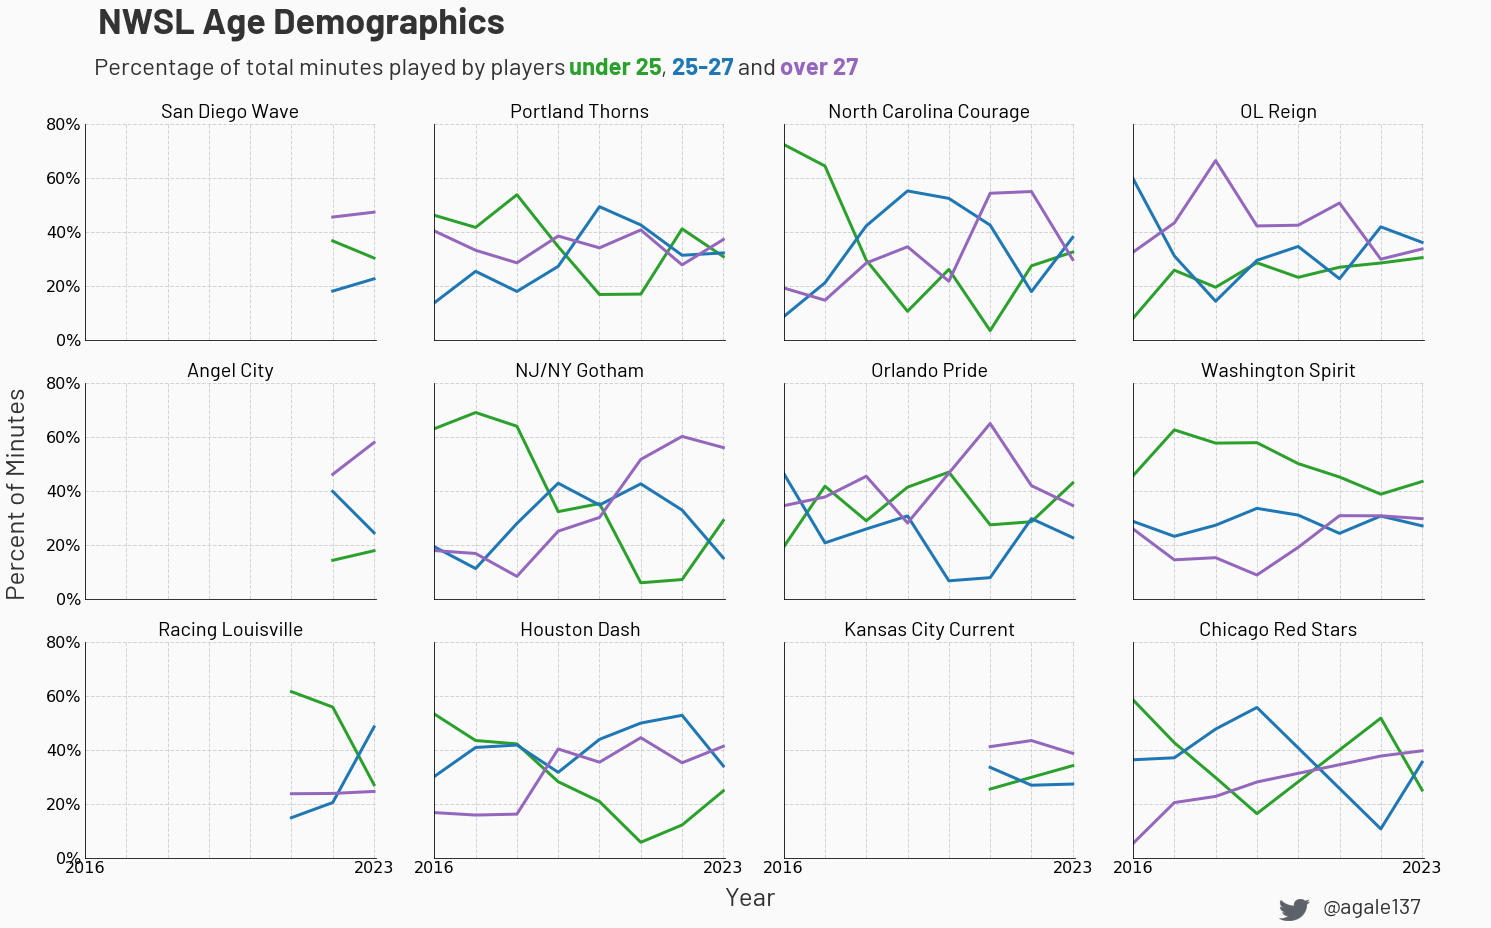

In [88]:
# General setup
plt.clf()
plt.rcParams["figure.figsize"] = (24, 13.5)
plt.figure(dpi=1200, facecolor=Colors.WHITE)
fig, axs = plt.subplots(3, 4)
fig.patch.set_facecolor(Colors.WHITE)

for i, team in enumerate(teams):
    ax = axs[int(i / 4), i % 4]
    ax.set_facecolor(Colors.WHITE)

    # Set title
    ax.set_title(labels[team], fontproperties=Fonts.BARLOW, size=20)

    # Handle axes and ticks
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    ax.set_ylim([0, 0.8])
    ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8])
    ax.tick_params(axis="both", which="both", length=0, labelsize=16)
    if i % 4 != 0:
        ax.yaxis.set_ticklabels([])
        ax.yaxis.set_ticks_position("none")

    ax.set_xlim([2016, 2023 + 0.05])
    ax.set_xticks([2016, 2023])
    ax.set_xticks(range(2016, 2023 + 1), minor=True)

    if int(i / 4) == 2:
        ax.xaxis.set_ticklabels([2016, 2023])
    else:
        ax.xaxis.set_ticklabels([])
        ax.xaxis.set_ticks_position("none")

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    # Add gridlines
    ax.set_axisbelow(True)
    ax.grid(which="both", ls="--", color=Colors.LIGHT_GRAY, linewidth=1)

    # Plot the data
    for (metric, color) in metrics:
        ax.plot(rates.loc[team].index, rates.loc[team][metric], color, lw=3)
        # Scatter is necessary when teams only appear in one year
        # ax.scatter(rates.loc[team].index, rates.loc[team][metric], c=color, s=60)

fig.supxlabel(
    "Year", x=0.51, y=0.07, fontproperties=Fonts.BARLOW, size=26, color=Colors.BLACK
)
fig.supylabel(
    "Percent of Minutes",
    x=0.08,
    fontproperties=Fonts.BARLOW,
    size=26,
    color=Colors.BLACK,
)

plt.suptitle(
    "NWSL Age Demographics",
    x=0.25,
    y=1.0,
    fontproperties=Fonts.BARLOW_BOLD,
    fontsize=36,
    color=Colors.BLACK,
)
fig_y = 0.93
x_off = -0.07
plt.figtext(
    x_off + 0.2,
    fig_y,
    "Percentage of total minutes played by players",
    fontproperties=Fonts.BARLOW,
    fontsize=24,
    color=Colors.BLACK,
)
plt.figtext(
    x_off + 0.475,
    fig_y,
    "under " + str(prime[0]),
    fontproperties=Fonts.BARLOW_BOLD,
    fontsize=24,
    color=metrics_dict[under_label],
)
plt.figtext(
    x_off + 0.528,
    fig_y,
    ",",
    fontproperties=Fonts.BARLOW,
    fontsize=24,
    color=Colors.BLACK,
)
plt.figtext(
    x_off + 0.535,
    fig_y,
    str(prime[0]) + "-" + str(prime[1]),
    fontproperties=Fonts.BARLOW_BOLD,
    fontsize=24,
    color=metrics_dict[prime_label],
)
plt.figtext(
    x_off + 0.57,
    fig_y,
    " and",
    fontproperties=Fonts.BARLOW,
    fontsize=24,
    color=Colors.BLACK,
)
plt.figtext(
    x_off + 0.597,
    fig_y,
    "over " + str(prime[1]),
    fontproperties=Fonts.BARLOW_BOLD,
    fontsize=24,
    color=metrics_dict[over_label],
)

add_twitter_handle(fig, x=0.81, y=0.06, fs=22, w=0.025)

# Save image
plt.savefig(
    "age_demographics" + str(prime[0]) + "_" + str(prime[1]) + ".png",
    bbox_inches="tight",
    pad_inches=0.5,
)